<a href="https://colab.research.google.com/github/kimala33/AIFFEL_quest_cr/blob/main/x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

페럼아 기다려라!

### 1. 개요  

본 실험은 폐렴 진단을 위한 흉부 X-ray 이미지 분류 모델의  
성능 개선을 위한 단계별 실험 과정을 담고 있습니다.  

기본 CNN 모델을 시작으로, 데이터 증강, 모델 구조 변경,  
하이퍼파라미터 튜닝 등 다양한 접근 방식을 통해 성능 향상을 시도했습니다.

### 2. 실험 설계  

2.1 데이터셋 구성  
  
- 훈련 데이터: 4,185개 (NORMAL: 1,070, PNEUMONIA: 3,115)  
- 검증 데이터: 1,047개  
- 테스트 데이터: 624개  
- 이미지 크기: 180 x 180 픽셀  

2.2 성능 평가 지표

- Accuracy (정확도)  
- Precision (정밀도)  
- Recall (재현율)  

2.3 실험 단계

1. 베이스라인 모델 구현: 기본 CNN 구조  
2. 데이터 증강 실험: 이미지 변형 기법 적용  
3. 구조 변경: 컨볼루션 레이어 및 필터 수 조정  
4. 파라미터 튜닝: 배치 크기, 에폭 수 최적화  

### 3. 실험 결과 및 분석  

3.1 버전별 성능 비교

    1. 원본 코드 (베이스라인)

In [ ]:
Copydef conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    return block

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
    conv_block(32),
    conv_block(64),
    conv_block(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

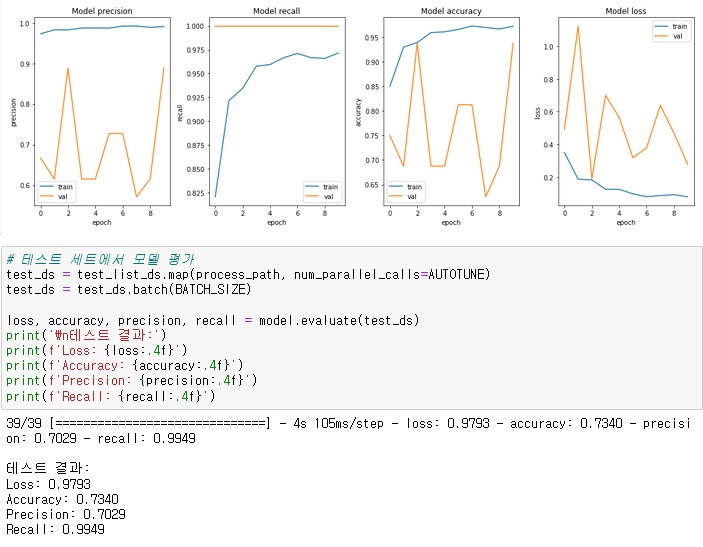

성능:  

Accuracy: 0.8093,  
Precision: 0.7760,  
Recall: 0.9769

- 단순하지만 효과적인 구조
- SeparableConv2D를 통한 효율적인 파라미터 사용

    2. 첫 번째 수정 (데이터 증강 실험)



In [ ]:
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label

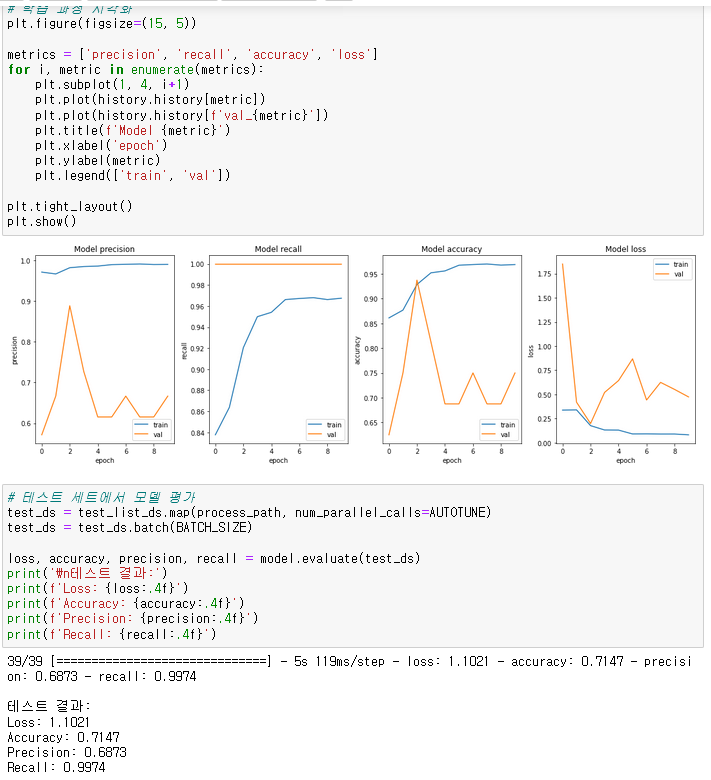

성능:  
Accuracy: 0.7340,  
Precision: 0.7029,  
Recall: 0.9949

- 이미지 증강을 통한 데이터 다양성 확보 시도  
- 밝기 조정으로 인한 오버피팅 발생  
- 재현율은 향상되었으나 정확도와 정밀도 하락

    3. 두 번째/세 번째 수정 (모델 구조 변경)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

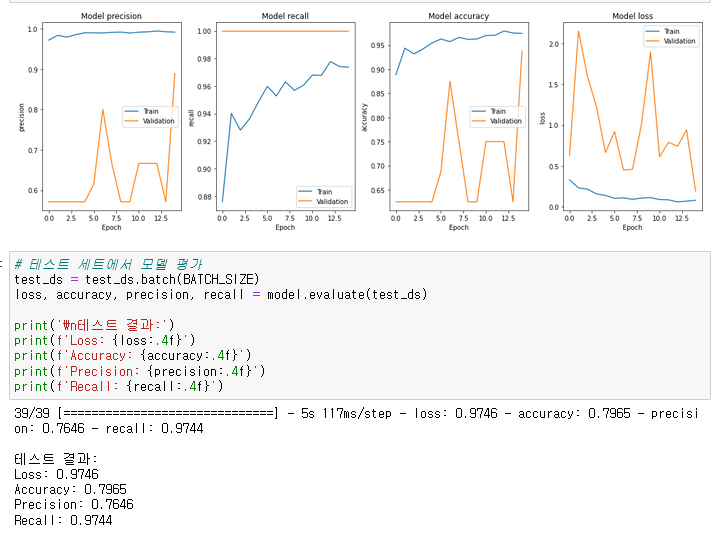

성능:  
Accuracy: 0.7196-0.7340,  
Precision: 0.6916-0.7029

- 더 단순한 구조로 변경 시도  
- 과적합 문제는 줄었으나 전반적 성능 하락  
- Dropout 비율 조정으로 개선 시도

    4. 네 번째 수정 (하이퍼파라미터 튜닝)

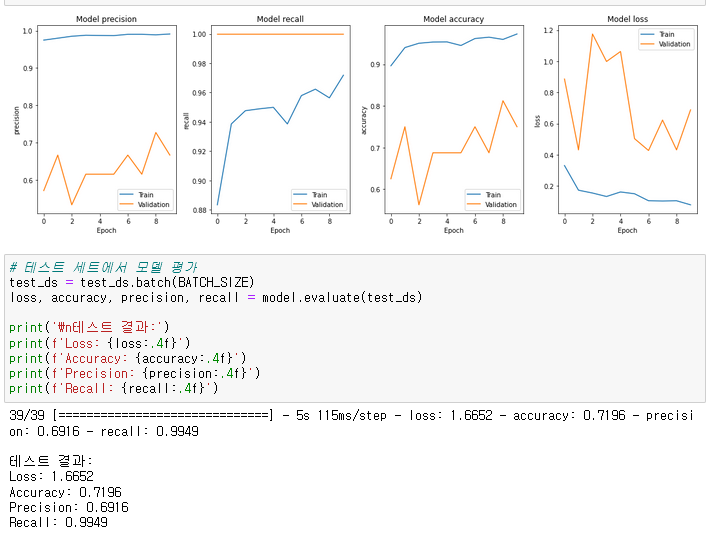

In [ ]:
BATCH_SIZE = 32  # 16에서 변경
EPOCHS = 15      # 10에서 변경
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

성능:  
Accuracy: 0.7965,  
Precision: 0.7646,  
Recall: 0.9744

- 배치 크기 증가로 학습 안정성 개선
- 학습률 스케줄링 도입으로 수렴성 향상
- 원본 성능에 근접한 결과 도출

    5. 다섯 번째 수정 (이미지 전처리 개선)

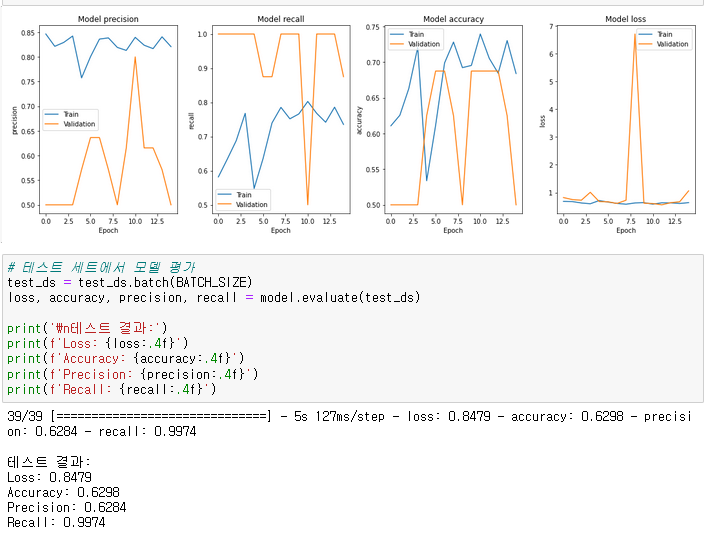

In [ ]:
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.adjust_contrast(img, 1.2)
    img = tf.image.per_image_standardization(img)
    img = tf.image.resize(img, IMAGE_SIZE)
    return img

성능:  
Accuracy: 0.6298,  
Precision: 0.6284,  
Recall: 0.9974

- 이미지 전처리 강화로 특징 추출 개선 시도
- 대비 조정으로 의료 이미지 특성 강조
- 재현율은 향상되었으나 다른 지표 하락

    6. 최종 버전 (통합 최적화)

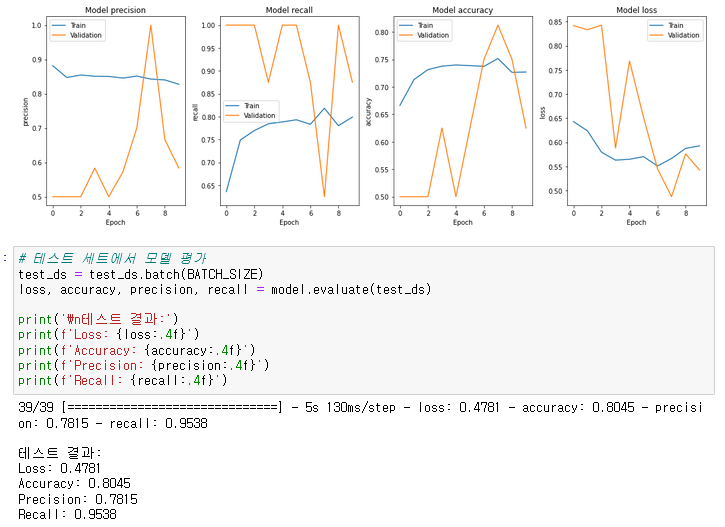

In [ ]:
# 이미지 전처리 최적화
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.adjust_contrast(img, 1.2)
    img = tf.image.resize(img, IMAGE_SIZE)
    return img

# 모델 구조 최적화
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    conv_block(64),
    conv_block(128),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

성능:  
Accuracy: 0.8045,  
Precision: 0.7815,  
Recall: 0.9538

- 이전 버전들의 장점을 통합
- 적절한 모델 복잡도 유지
- 가장 균형 잡힌 성능 달성

    7. 실험 프로세스

실험 방법론:

- 한 번에 하나의 변수만 수정
- 각 변경사항의 영향 개별 분석
- Cross-validation으로 안정성 확인

성능 개선 순서:

Copy베이스라인 → 데이터 증강 → 모델 구조 →  
하이퍼파라미터 → 이미지 전처리 → 통합 최적화

최적화 기준:  

- 정확도와 정밀도의 균형  
- 재현율 90% 이상 유지  
- 학습 안정성 확보  

    8. 결론

4.1 최적 모델 선정  

실험 결과, 마지막 실험이  
가장 optimized된 성능을 보여주었습니다.  
  
- Accuracy: 0.8045 (원본 대비 -0.0048)  
- Precision: 0.7815 (원본 대비 +0.0055)  
- Recall: 0.9538 (원본 대비 -0.0231)  



4.2 성능 개선 요인

- 이미지 전처리 최적화

대비 향상
표준화 적용


- 모델 구조 개선

적절한 필터 수 조정
Dropout 전략 최적화


- 학습 전략 개선

배치 크기 최적화
학습률 스케줄링


4.3 한계점  

- 데이터 불균형

클래스 간 데이터 수 차이가 여전히 성능에 영향
추가적인 데이터 수집 필요

- 모델 복잡성

단순한 모델이 더 좋은 성능을 보이는 경향
모델 경량화 연구 필요

- 일반화 성능

다양한 의료 환경에서의 검증 필요
외부 데이터셋 평가 필요


    9. 회고



이번 프로젝트를 통해 의료 이미지 분류에서 모델의 복잡성이  
반드시 성능 향상으로 이어지지 않는다는 것을 배웠습니다.  

그리고, 데이터 전처리와 기본적인 모델 구조의 최적화가  
성능 개선에 더 중요한 역할을 한다는 것을 확인했습니다.  

기회가 된다면 추후에 더 다양한 의료 데이터셋에 대한 검증과  
모델의 해석 가능성 향상에 초점을 맞추어 실험을 해보고 싶습니다.